In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, classification_report, accuracy_score, recall_score, f1_score, confusion_matrix, mean_squared_error, precision_score

In [3]:
final_dataset = pd.read_csv('cleaned_data.csv')

In [4]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

In [5]:
def classifiers(X_train, X_test, y_train, y_test):
    rf_params = {'n_estimators': [50, 100, 200]}
    knn_params = {'n_neighbors': [3, 5, 7]}
    
    rf_classifier = GridSearchCV(RandomForestClassifier(), rf_params)
    knn_classifier = GridSearchCV(KNeighborsClassifier(), knn_params)
    xgb_classifier = XGBClassifier()
    gb_classifier = GradientBoostingClassifier()
    
    classifiers = {"Random Forest": rf_classifier,
                   "K-Nearest Neighbors" : knn_classifier,
                   "XGBoost": xgb_classifier,
                   "Gradient Boosting": gb_classifier
                  }
    
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[name] = {'accuracy': accuracy, 'f1_score': f1}

    best_model = None
    best_avg_score = 0
    for name, scores in results.items():
        avg_score = (scores['accuracy'] + scores['f1_score']) / 2
        if avg_score > best_avg_score:
            best_avg_score = avg_score
            best_model = name

    return best_model, results[best_model]['accuracy'], results[best_model]['f1_score']

best_model, best_accuracy, best_f1_score = classifiers(X_train, X_test, y_train, y_test)
print(f"Best Model: {best_model}, Best Accuracy: {best_accuracy}, Best F1-Score: {best_f1_score}")


Best Model: XGBoost, Best Accuracy: 0.840937114673243, Best F1-Score: 0.16774193548387098


In [60]:
xgb = XGBClassifier(booster='gbtree', random_state=42, n_jobs=-1, verbose=2)
xgb.fit(X_train, y_train)

C:\Users\hp\OneDrive\Desktop\Projects\myvenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:27:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [63]:
accuracy = xgb.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

y_pred = xgb.predict(X_test)
print(y_pred)

f1 = f1_score(y_test, y_pred)
print(f'F1 score : {f1}')

Accuracy: 0.840937114673243
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0

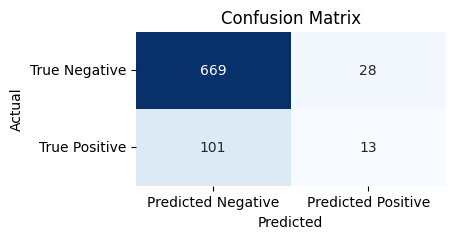

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter tunning

In [72]:
# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.3, 0.5, 0.7],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'eval_metric' : ['rmse'],
    'tree_method': ['exact']
}

# Creating XGBoost classifier
xgb = XGBClassifier(booster='gbtree', objective='binary:logistic',
                    random_state=42, n_jobs=-1, verbose=2, tree_method='exact', gpu_id=-1)


# Creating GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=3, n_jobs=-1)

# Performing the grid search
grid_search.fit(X_train, y_train)

C:\Users\hp\OneDrive\Desktop\Projects\myvenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:43:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id=-1,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learn...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'eval_metric': ['rmse'],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7, 10],
                         'subsample': [0.3, 0.5, 0.7],
                         'tree_method': ['exact']})

In [73]:
# Getting the best parameters
best_params = grid_search.best_params_

# Using the best parameters to create a new RandomForestClassifier
best_xgb = XGBClassifier(**best_params)

# Fitting the model with the best parameters
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
# Evaluate the model
accuracy = best_xgb.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8594327990135635


In [83]:
y_pred = best_xgb.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       697
           1       0.50      0.01      0.02       114

    accuracy                           0.86       811
   macro avg       0.68      0.50      0.47       811
weighted avg       0.81      0.86      0.80       811



In [77]:
print(best_xgb.score(X_train, y_train))
print(best_xgb.score(X_test, y_test))

0.8629629629629629
0.8594327990135635


In [78]:
f1 = f1_score(y_test, y_pred)
print(f'F1 score : {f1}')

F1 score : 0.017241379310344827


In [79]:
y_pred = best_xgb.predict(X_test)

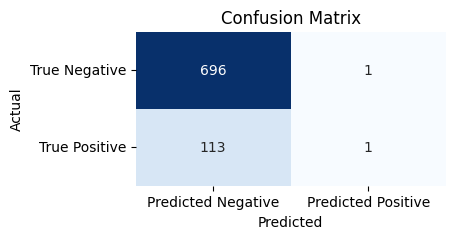

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

One approach to addressing imbalanced datasets is to oversample the minority class. 

The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
smote=SMOTE()
x_train,y_train=smote.fit_resample(X_train,y_train)

In [84]:
best_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
y_pred_xg         = best_xgb.predict(X_test)
y_pred_train_xg   = best_xgb.predict(x_train)

In [89]:
print("RMSE using XGBoost on train Data : {} %".format(np.round(np.sqrt(mean_squared_error(y_train, y_pred_train_xg)),4)))

RMSE using XGBoost on train Data : 0.4453 %


In [90]:
print("RMSE using XGBoost on test Data : {} %".format(np.round(np.sqrt(mean_squared_error(y_test, y_pred_xg)),4)))

RMSE using XGBoost on test Data : 0.5325 %


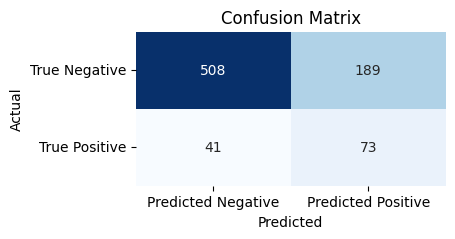

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [107]:
accuracy = accuracy_score(y_test, y_pred_xg)
print(accuracy)

0.7163995067817509


In [108]:
precise = precision_score(y_test, y_pred_xg)
print(precise)

0.2786259541984733


In [109]:
recall = recall_score(y_test, y_pred_xg)
print(recall)

0.6403508771929824


In [110]:
f1_sc = f1_score(y_test, y_pred_xg)
print(f1_sc)

0.3882978723404255
